# Pregunta 5

## Questioning

### ¿Is there a relationship between ESPOL graduates and a company's financial performace metric?

Background: 

ROA (Return Of Assets) is proposed as one of the best financial metrics to measure a company's performance due to it being directly tied to the management of assets of a company. It's so powerful that some researchers have tried to find relationship between this and the human talent a company harbors (even if they aren't directly linked with one another).

So, we'll see if there's atleast a superficial correlation between the number of ESPOL graduates a company employeed as part of their internal workforce and their own ROA score. 

## Setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Datasets/mainDF.csv')
df.head(2)

,NOMBRE,LINK,2020,2019,EXPEDIENTE,TIPO COMPAÑIA,ACTIVIDAD ECONÓMICA,REGION,PROVINCIA,CIUDAD,...,CANT. EMPLEADOS,ACTIVO2020,PATRIMONIO2020,INGRESOS POR VENTA2020,UTILIDAD ANTES DE 2020,UTILIDAD DEL EJERCICIO2020,UTILIDAD NETA2020,IR CAUSADO2020,INGRESO TOTAL2020,INDUSTRIA
0,CORPORACION FAVORITA C.A.,https://ec.linkedin.com/company/corporacionfav...,1.0,1,384.0,ANÓNIMA,G4711.01 - VENTA AL POR MENOR DE GRAN VARIEDAD...,SIERRA,PICHINCHA ...,QUITO ...,...,10768.0,2.121860e+09,1.482973e+09,2.170603e+09,187168402.3,2.201981e+08,1.474992e+08,41971212.00,2.170603e+09,Minoristas
1,ECUACORRIENTE,https://www.linkedin.com/company/ecuacorriente...,2.0,4,6796.0,ANÓNIMA,B0729.01 - EXTRACCIÓN Y PREPARACIÓN DE MINERAL...,ORIENTE,ZAMORA CHINCHIPE ...,EL PANGUI ...,...,966.0,1.607423e+09,5.689866e+08,2.451030e+08,-1387158.7,0.000000e+00,-2.633856e+06,1246697.02,0.000000e+00,Minería


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   NOMBRE                      100 non-null    object 
 1   LINK                        100 non-null    object 
 2   2020                        100 non-null    float64
 3   2019                        100 non-null    object 
 4   EXPEDIENTE                  100 non-null    float64
 5   TIPO COMPAÑIA               100 non-null    object 
 6   ACTIVIDAD ECONÓMICA         100 non-null    object 
 7   REGION                      100 non-null    object 
 8   PROVINCIA                   100 non-null    object 
 9   CIUDAD                      100 non-null    object 
 10  TAMAÑO                      100 non-null    object 
 11  SECTOR                      100 non-null    object 
 12  CANT. EMPLEADOS             100 non-null    float64
 13  ACTIVO2020                  100 non-

## Processing

In [4]:
# Calculate ROA (Return on Assets)
def calculate_ROA(row):
  net_profits = row["UTILIDAD NETA2020"]
  total_assets = row.ACTIVO2020
  return ((net_profits/total_assets) * 100)
  

df['ROA'] = df[["UTILIDAD NETA2020", "ACTIVO2020"]].apply(calculate_ROA, axis=1)
df[["NOMBRE", "ROA"]].head(10)

,NOMBRE,ROA
0,CORPORACION FAVORITA C.A.,6.951411
1,ECUACORRIENTE,-0.163856
2,AURELIAN ECUADOR,-3.087969
3,CONSORCIO ECUATORIANO DE TELECOMUNICACIONES CO...,8.772698
4,CORPORACION QUIPORT,-3.323227
5,CORPORACION EL ROSADO,3.663400
6,HIDALGO E HIDALGO,3.520079
7,OTECEL,-2.313952
8,PROCESADORA NACIONAL DE ALIMENTOS C.A. PRONACA,3.620939
9,INDUSTRIAL PESQUERA SANTA PRISCILA,4.808221


In [5]:
df_uni = pd.read_csv('Datasets/clean_where_they_studied.csv')
df_uni = df_uni[["NOMBRE", "Escuela Superior Politécnica del Litoral"]]
df_uni

,NOMBRE,Escuela Superior Politécnica del Litoral
0,CORPORACION FAVORITA C.A.,14.0
1,CONSORCIO ECUATORIANO DE TELECOMUNICACIONES CO...,86.0
2,CORPORACION EL ROSADO,123.0
3,HIDALGO E HIDALGO,12.0
4,OTECEL,0.0
...,...,...
93,SOCIEDAD AGRICOLA E INDUSTRIAL SAN CARLOS SA,37.0
94,ICESA,0.0
95,INDEUREC,3.0
96,LIMBOMAR,4.0


In [6]:
merged = pd.merge(df, df_uni)
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99 entries, 0 to 98
Data columns (total 24 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   NOMBRE                                    99 non-null     object 
 1   LINK                                      99 non-null     object 
 2   2020                                      99 non-null     float64
 3   2019                                      99 non-null     object 
 4   EXPEDIENTE                                99 non-null     float64
 5   TIPO COMPAÑIA                             99 non-null     object 
 6   ACTIVIDAD ECONÓMICA                       99 non-null     object 
 7   REGION                                    99 non-null     object 
 8   PROVINCIA                                 99 non-null     object 
 9   CIUDAD                                    99 non-null     object 
 10  TAMAÑO                                  

In [7]:
df = merged.copy()
df.rename(columns={"Escuela Superior Politécnica del Litoral": "ESPOL"}, inplace=True)
df.head(5)

,NOMBRE,LINK,2020,2019,EXPEDIENTE,TIPO COMPAÑIA,ACTIVIDAD ECONÓMICA,REGION,PROVINCIA,CIUDAD,...,PATRIMONIO2020,INGRESOS POR VENTA2020,UTILIDAD ANTES DE 2020,UTILIDAD DEL EJERCICIO2020,UTILIDAD NETA2020,IR CAUSADO2020,INGRESO TOTAL2020,INDUSTRIA,ROA,ESPOL
0,CORPORACION FAVORITA C.A.,https://ec.linkedin.com/company/corporacionfav...,1.0,1,384.0,ANÓNIMA,G4711.01 - VENTA AL POR MENOR DE GRAN VARIEDAD...,SIERRA,PICHINCHA ...,QUITO ...,...,1.482973e+09,2.170603e+09,187168402.3,2.201981e+08,1.474992e+08,4.197121e+07,2.170603e+09,Minoristas,6.951411,14.0
1,ECUACORRIENTE,https://www.linkedin.com/company/ecuacorriente...,2.0,4,6796.0,ANÓNIMA,B0729.01 - EXTRACCIÓN Y PREPARACIÓN DE MINERAL...,ORIENTE,ZAMORA CHINCHIPE ...,EL PANGUI ...,...,5.689866e+08,2.451030e+08,-1387158.7,0.000000e+00,-2.633856e+06,1.246697e+06,0.000000e+00,Minería,-0.163856,0.0
2,AURELIAN ECUADOR,https://www.linkedin.com/company/lundin-gold/?...,3.0,3,93144.0,ANÓNIMA,B0899.09 - EXTRACCIÓN DE OTROS MINERALES: ASBE...,ORIENTE,ZAMORA CHINCHIPE ...,LOS ENCUENTROS ...,...,6.052935e+08,3.587926e+08,-49399080.0,-4.939908e+07,-4.939908e+07,4.077977e+06,3.588240e+08,Minería,-3.087969,21.0
3,CONSORCIO ECUATORIANO DE TELECOMUNICACIONES CO...,https://ec.linkedin.com/company/conecel?trk=co...,5.0,5,47845.0,ANÓNIMA,"J6120.01 - OPERACIÓN, MANTENIMIENTO O FACILITA...",COSTA,GUAYAS ...,GUAYAQUIL ...,...,2.647091e+08,1.066242e+09,174644376.0,2.048239e+08,1.068268e+08,6.781763e+07,1.071561e+09,Telecomunicaciones/Informática,8.772698,86.0
4,CORPORACION QUIPORT,https://ec.linkedin.com/company/quiport?trk=co...,7.0,8,93325.0,ANÓNIMA,M7020.04 - PRESTACIÓN DE ASESORAMIENTO Y AYUDA...,SIERRA,PICHINCHA ...,QUITO ...,...,2.128526e+08,1.249086e+09,-27053323.0,-2.705332e+07,-2.705332e+07,4.077977e+06,8.353065e+07,Logística/Transporte,-3.323227,0.0


## Looking For Correlation

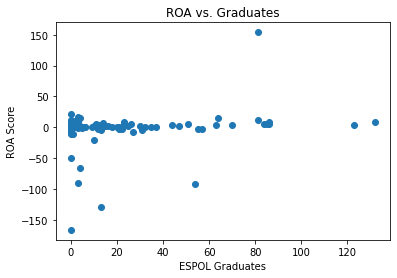

In [8]:
# Let's use a scatter plot to visually check if there's a pattern/behaviour as the number of ESPOL alumni increases.
plt.plot( 'ESPOL', 'ROA', data=df, linestyle='none', marker='o')
plt.xlabel('ESPOL Graduates')
plt.ylabel('ROA Score')
plt.title("ROA vs. Graduates")
plt.show()

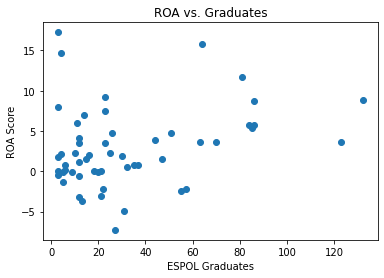

In [9]:
# Let's zoom in to appreciate better
df_viz = df.loc[ (df['ESPOL'] < 1000) & (abs(df['ROA']) < 20) & (df['ESPOL'] > 2)]
plt.plot( 'ESPOL', 'ROA', data=df_viz, linestyle='none', marker='o')
plt.xlabel('ESPOL Graduates')
plt.ylabel('ROA Score')
plt.title("ROA vs. Graduates")
plt.show()

In [10]:
# Now analitically (Pearson)
df_corr = df[["ROA", "ESPOL"]].corr()
df_corr.loc["ROA", "ESPOL"]

0.1971714114378395

In [11]:
# Pearson is suceptible to be influeced by great distance between values (outliers) so let's check with Spearman as well
df_corr_spear = df[["ROA", "ESPOL"]].corr(method='spearman')
df_corr_spear.loc["ROA", "ESPOL"]

0.21087616597841205

### Preemptive analysis
There seems to be small correlation between the number of ESPOL alumni working at a given company (from the top 100) and the company's Return of Assets (ROA). As evidenced by both coefficients giving values around 0.2. To a degree, this (or lower) could be expected, since the ROA metric has a lot more to do with internal tangible asset management of the company rather than the productivity or efficiency of their employees, nonetheless, some of the literature suggested this could be an interesting find (check the article for details on the literature).

This is not to say one causes the other, there are many other factors in play that might by causing this, for example, companies that hire from top Universities of the country might have access to better management as a whole, therefore, it's logical that the company's ROA tends to be higher than that of a company that cannot afford a graduate from the countries top universities; meaning it might not be the work of the graduate itself.

In [12]:
# Look for correlations between emlployee amount in order to discard possiblity of ESPOL alumni being a very small fraction of a company's resourses
df_corr = df[["ROA", "CANT. EMPLEADOS"]].corr()
df_corr.loc["ROA", "CANT. EMPLEADOS"]

-0.03568414072290252

In [13]:
# Look for correlations between emlployee amount in order to discard possiblity of ESPOL alumni being a very small fraction of a company's resourses
df_corr = df[["ROA", "CANT. EMPLEADOS"]].corr(method='spearman')
df_corr.loc["ROA", "CANT. EMPLEADOS"]


0.07385418406172267

### Conclusion
While we observe a relatively weak correlation between ROA and ESPOL alumni, it is to early to tell the true meaning of this find. This could very well mean that companies hiring from top universities of the country have access to overall better management, even more, the relationship might be explained more trivially: companies that can afford to hire graduates from top level universities of the country tend to have bigger utilities, factor that it's directly related to the ROA metric of a company, since the ROA score it's computed using the utility of the company.

Espol alumni might be more impactful in human resources related metrics for performace, however with the data we have available, we cannot calculate such metrics. However this could be interesting for a ESPOL graduate; to know that companies that look forward to hiring them might have the tendency to perform well in company performance metrics to a small degree.

All and all, our exploratory analysis shows that top 100 companies in Ecuador hire their employees from a diverse set of universities (check clean_where_they_studied.csv dataframe). There's seem to be a small correlation between ESPOL employee and a company's and the ROA according the SUPERCIAS dataset.
